In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## True demand

In [2]:
with open("output/true_demand_7_9_0627_results.json") as f:
    temp_json = json.load(f)

In [3]:
print(f"Levaing rate:{temp_json['pax_leaving_rate'][0]} \t Mean waiting time:{np.mean(temp_json['pax_wait_time'])} \t Mean traveling time: {np.mean(temp_json['pax_travel_time'])}")

Levaing rate:0.05103367299870005 	 Mean waiting time:127.38199939470664 	 Mean traveling time: 426.00292042649335


## Robust optimization

In [2]:
# evaluation metrics
ρ_list = [3]
Γ_list = [0, 5, 10]
metrics = {}
for k1 in ρ_list:
    for k2 in Γ_list:
        metrics[(k1,k2)] = {"waiting":None, "traveling":None, "leaving_rate":None}
for file in os.listdir("output/historical_poisson/"):
    with open("output/historical_poisson/" + file) as json_file:
        temp_json = json.load(json_file)

    rho = float(file.split('_')[0])
    gamma = int(file.split('_')[1])
    
    metrics[(rho,gamma)]["waiting"] = temp_json['pax_wait_time']
    metrics[(rho,gamma)]["traveling"] = temp_json['pax_travel_time']
    metrics[(rho,gamma)]["leaving_rate"] = temp_json['pax_leaving_rate'][0]

In [3]:
metrics_graph = {}
for k1 in ρ_list:
    for k2 in Γ_list:
        metrics_graph[(k1,k2)] = {"waiting":None, "traveling":None, "leaving_rate":None}
for file in os.listdir("output/graph_lstm_poisson/"):
    with open("output/graph_lstm_poisson/" + file) as json_file:
        temp_json = json.load(json_file)

    rho = float(file.split('_')[0])
    gamma = int(file.split('_')[1])
    
    metrics_graph[(rho,gamma)]["waiting"] = temp_json['pax_wait_time']
    metrics_graph[(rho,gamma)]["traveling"] = temp_json['pax_travel_time']
    metrics_graph[(rho,gamma)]["leaving_rate"] = temp_json['pax_leaving_rate'][0]

In [4]:
ro, gamma = zip(*metrics.keys())

### Normal

Text(0.5, 0.98, 'Leaving Rate')

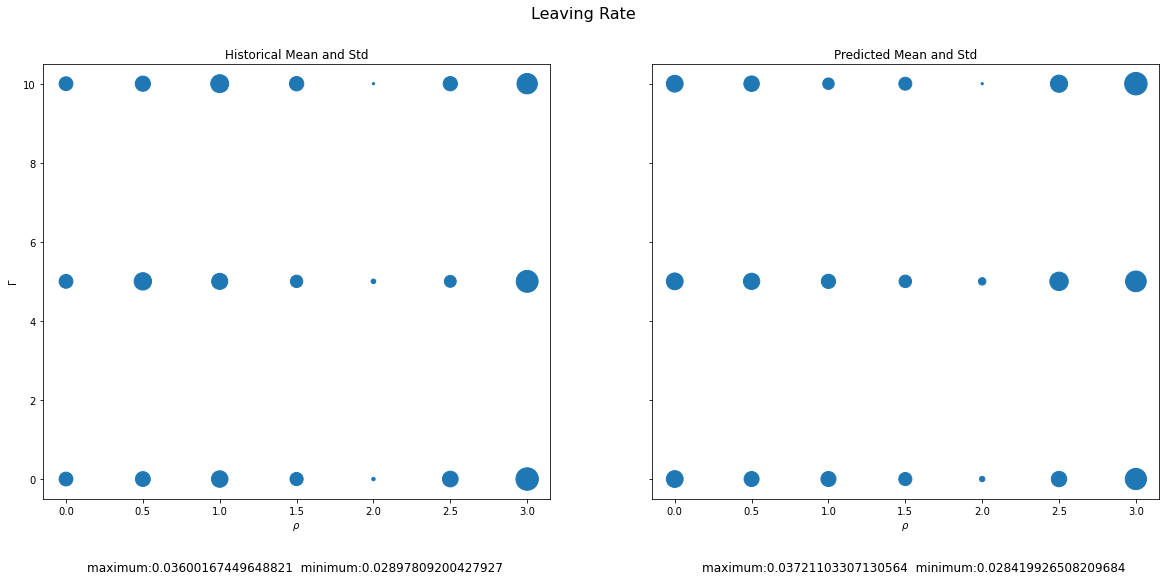

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
leaving = [k['leaving_rate'] for k in metrics.values()]
maxi = max(leaving)
mini = min(leaving)
leaving_standard = (np.array(leaving)-mini)/(maxi-mini)

ax1.scatter(ro, gamma, s=(leaving_standard+0.01)*500)
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical Mean and Std")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
leaving = [k['leaving_rate'] for k in metrics_graph.values()]
maxi = max(leaving)
mini = min(leaving)
leaving_standard = (np.array(leaving)-mini)/(maxi-mini)

ax2.scatter(ro, gamma, s=(leaving_standard+0.01)*500)
ax2.set_xlabel(r"$\rho$")
ax2.set_title("Predicted Mean and Std")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Leaving Rate', fontsize=16)

Text(0.5, 0.98, 'Average waiting time')

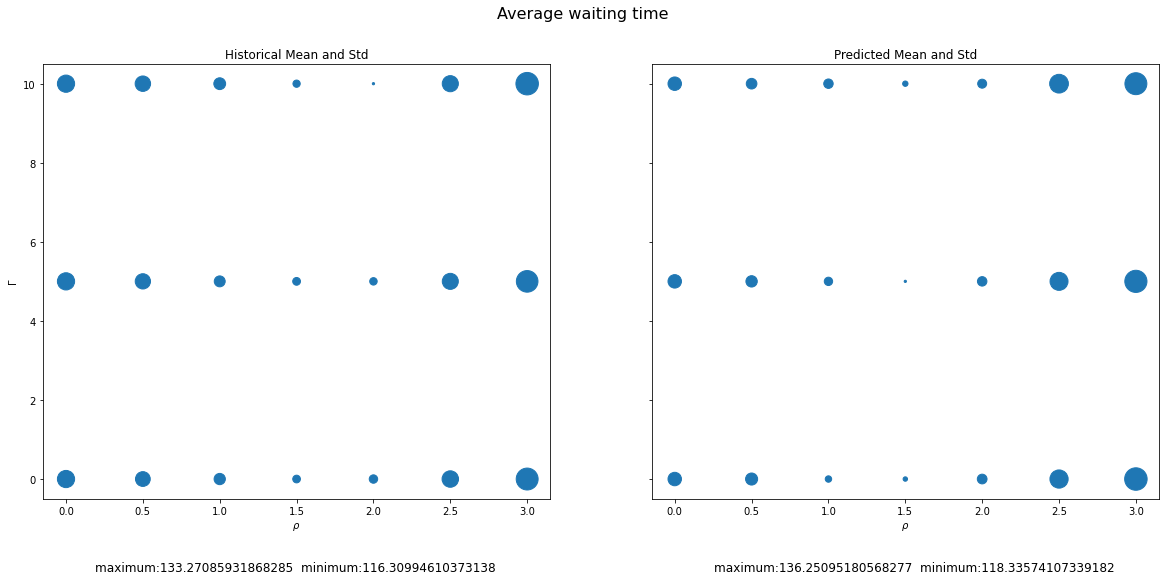

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
waiting = [np.mean(k['waiting']) for k in metrics.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax1.scatter(ro, gamma, s=(waiting_standard+0.01)*500)
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical Mean and Std")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
waiting = [np.mean(k['waiting']) for k in metrics_graph.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax2.scatter(ro, gamma, s=(waiting_standard+0.01)*500)
ax2.set_xlabel(r"$\rho$")
ax2.set_title("Predicted Mean and Std")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Average waiting time', fontsize=16)

Text(0.5, 0.98, 'Average traveling time')

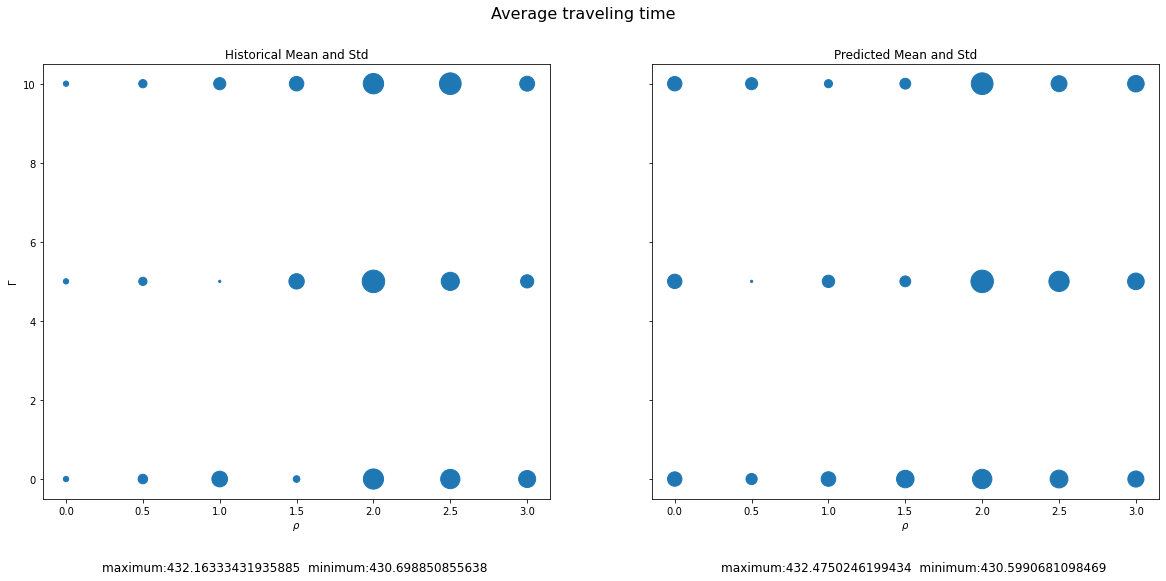

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
traveling = [np.mean(k['traveling']) for k in metrics.values()]
maxi = max(traveling)
mini = min(traveling)
traveling_standard = (np.array(traveling)-mini)/(maxi-mini)

ax1.scatter(ro, gamma, s=(traveling_standard+0.01)*500)
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical Mean and Std")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
traveling = [np.mean(k['traveling']) for k in metrics_graph.values()]
maxi = max(traveling)
mini = min(traveling)
waiting_standard = (np.array(traveling)-mini)/(maxi-mini)

ax2.scatter(ro, gamma, s=(waiting_standard+0.01)*500)
ax2.set_xlabel(r"$\rho$")
ax2.set_title("Predicted Mean and Std")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Average traveling time', fontsize=16)

### Poisson

In [7]:
for k,v in metrics.items():
    print(f"{k}:{np.mean(v['waiting'])}")

(3, 0):137.93366846217017
(3, 5):135.3609377300788
(3, 10):135.80744376827016


In [8]:
for k,v in metrics_graph.items():
    print(f"{k}:{np.mean(v['waiting'])}")

(3, 0):130.065893148018
(3, 5):129.693350761507
(3, 10):129.78270747175472


## Robust optimization with provided interval

In [2]:
def get_metrics(path):
    z_list = [50,75,95]
    Γ_list = [0, 5, 10]
    metrics = {}
    for k1 in z_list:
        for k2 in Γ_list:
            metrics[(k1,k2)] = {"waiting":None, "traveling":None, "leaving_rate":None}
    for file in os.listdir(path):
        with open(path + file) as json_file:
            temp_json = json.load(json_file)

        percent = int(file.split('.')[0].split('_')[-1])
        gamma = int(file.split('_')[1])

        metrics[(percent,gamma)]["waiting"] = temp_json['pax_wait_time']
        metrics[(percent,gamma)]["traveling"] = temp_json['pax_travel_time']
        metrics[(percent,gamma)]["leaving_rate"] = temp_json['pax_leaving_rate'][0]
    
    return metrics

### 0628

### 0627

In [3]:
# True demand
with open("output/true_demand_7_9_0627_results.json") as f:
    true_json = json.load(f)

true_waiting = np.mean(true_json['pax_wait_time'])
print(f"Levaing rate:{true_json['pax_leaving_rate'][0]} \t Mean waiting time:{np.mean(true_json['pax_wait_time'])} \t Mean traveling time: {np.mean(true_json['pax_travel_time'])}")

Levaing rate:0.05103367299870005 	 Mean waiting time:127.38199939470664 	 Mean traveling time: 426.00292042649335


In [4]:
metrics = get_metrics("output/historical_poisson_0627/")
metrics_nn = get_metrics("output/graph_lstm_poisson_0627/")

In [4]:
percent, gamma = zip(*metrics.keys())

Text(0.5, 0.98, 'Poisson')

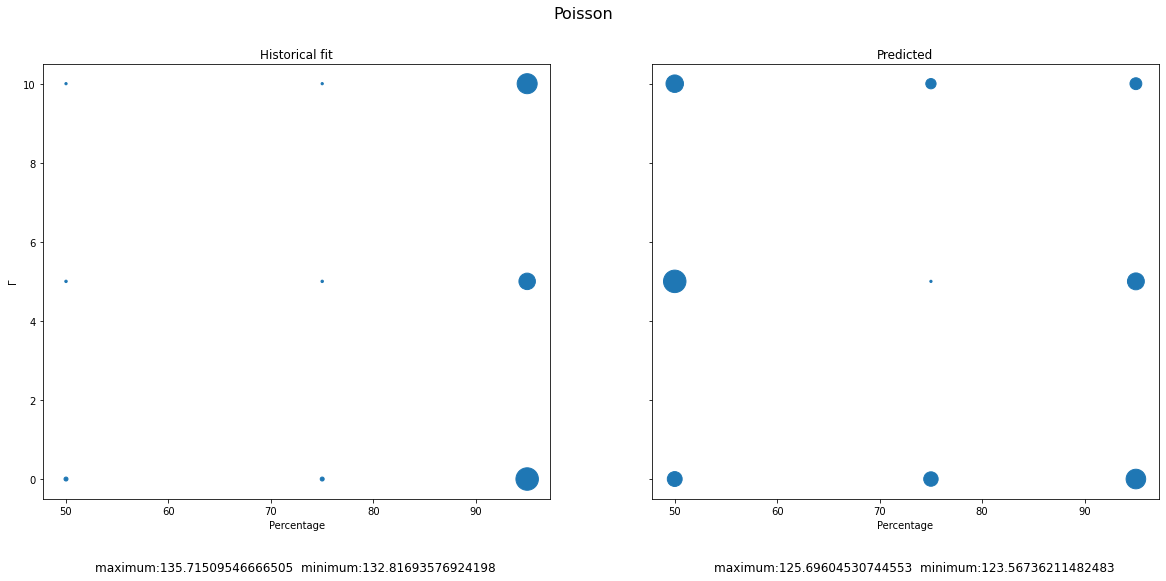

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
waiting = [np.mean(k['waiting']) for k in metrics.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax1.scatter(percent, gamma, s=(waiting_standard+0.01)*500)
ax1.set_xlabel(r"Percentage")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical fit")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
waiting = [np.mean(k['waiting']) for k in metrics_nn.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax2.scatter(percent, gamma, s=(waiting_standard+0.01)*500)
ax2.set_xlabel(r"Percentage")
ax2.set_title("Predicted")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Poisson', fontsize=16)

In [29]:
metrics_nb = get_metrics("output/graph_lstm_nb_0627/")

Text(0.5, 0.98, 'Average waiting time')

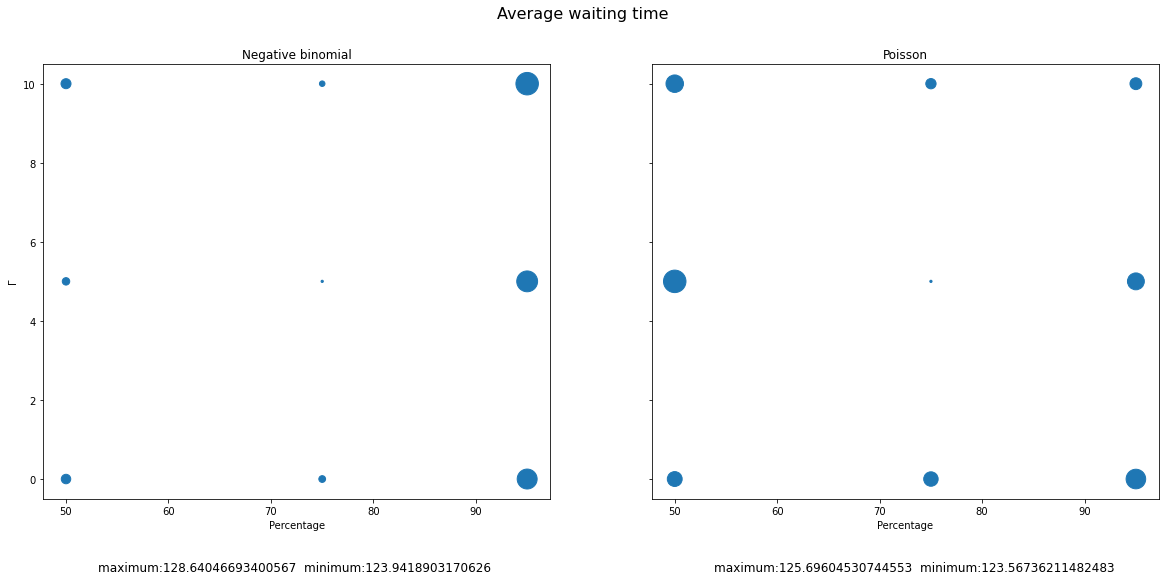

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
waiting = [np.mean(k['waiting']) for k in metrics_nb.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax1.scatter(percent, gamma, s=(waiting_standard+0.01)*500)
ax1.set_xlabel(r"Percentage")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Negative binomial")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
waiting = [np.mean(k['waiting']) for k in metrics_nn.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax2.scatter(percent, gamma, s=(waiting_standard+0.01)*500)
ax2.set_xlabel(r"Percentage")
ax2.set_title("Poisson")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Average waiting time', fontsize=16)

In [5]:
metrics = get_metrics("output/historical_normal_0627/")
metrics_nn = get_metrics("output/graph_lstm_normal_0627/")

Text(0.5, 0.98, 'Normal')

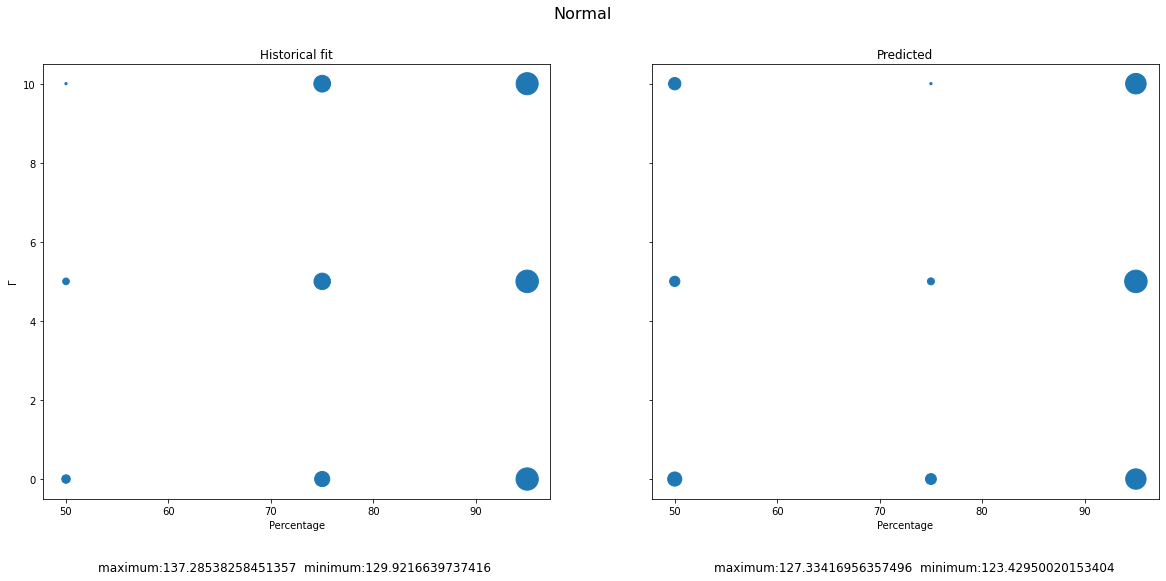

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
waiting = [np.mean(k['waiting']) for k in metrics.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax1.scatter(percent, gamma, s=(waiting_standard+0.01)*500)
ax1.set_xlabel(r"Percentage")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical fit")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
waiting = [np.mean(k['waiting']) for k in metrics_nn.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax2.scatter(percent, gamma, s=(waiting_standard+0.01)*500)
ax2.set_xlabel(r"Percentage")
ax2.set_title("Predicted")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Normal', fontsize=16)

## Summary

In [5]:
metrics_norm = get_metrics("output/graph_lstm_normal_0627/")
metrics_nb = get_metrics("output/graph_lstm_nb_0627/")
metrics_poisson = get_metrics("output/graph_lstm_poisson_0627/")

In [6]:
waiting_norm = [np.mean(k['waiting']) for k in metrics_norm.values()]
waiting_nb = [np.mean(k['waiting']) for k in metrics_nb.values()]
waiting_poisson = [np.mean(k['waiting']) for k in metrics_poisson.values()]
matrix = np.array([waiting_norm, waiting_nb, waiting_poisson])

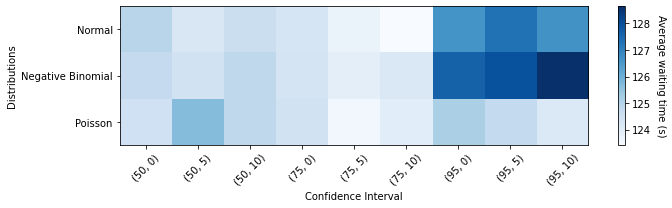

In [25]:
import matplotlib.colors as mcolors

row_labels = ['Normal', 'Negative Binomial', 'Poisson']
column_labels = metrics_norm.keys()

# Create the heatmap
plt.figure(figsize=(10, 3))  # Adjust the size as per your preference
plt.imshow(matrix, cmap='Blues', aspect='auto', interpolation='nearest')

# Show colorbar
cbar = plt.colorbar()
cbar.set_label('Average waiting time (s)', rotation=270, labelpad=15)

# Set tick labels and show them
plt.xticks(np.arange(len(column_labels)), column_labels, rotation=45)
plt.yticks(np.arange(len(row_labels)), row_labels)
plt.xlabel('Confidence Interval')
plt.ylabel('Distributions')

# Set the title
# plt.title('Average waiting time of different scenarios')

# Show the plot
plt.tight_layout()
plt.savefig("average_waiting.png")
plt.show()

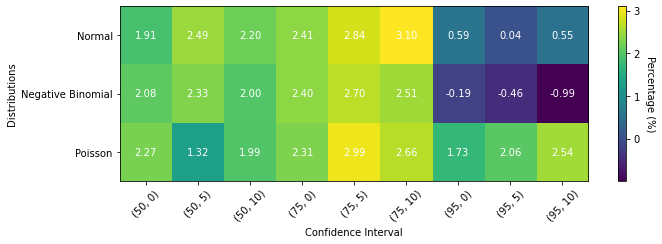

In [26]:
matrix_true = -100 * np.round((matrix - true_waiting) / true_waiting, 4)

# Create the heatmap
plt.figure(figsize=(10, 3.5))  # Adjust the size as per your preference
plt.imshow(matrix_true, aspect='auto', interpolation='nearest')

# Show colorbar
cbar = plt.colorbar()
cbar.set_label('Percentage (%)', rotation=270, labelpad=15)

# Create text
for y in range(matrix_true.shape[0]):
    for x in range(matrix_true.shape[1]):
        plt.text(x, y, '%.2f' % matrix_true[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='w'
                 )

# Set tick labels and show them
plt.xticks(np.arange(len(column_labels)), column_labels, rotation=45)
plt.yticks(np.arange(len(row_labels)), row_labels)
plt.xlabel('Confidence Interval')
plt.ylabel('Distributions')

# Set the title
# plt.title('Decreased average waiting time (%)')

# Show the plot
plt.tight_layout()
plt.savefig("average_waiting_true.png")
plt.show()

In [27]:
metrics_norm_his = get_metrics("output/historical_normal_0627/")
metrics_poisson_his = get_metrics("output/historical_poisson_0627/")

waiting_norm_his = [np.mean(k['waiting']) for k in metrics_norm_his.values()]
waiting_poisson_his = [np.mean(k['waiting']) for k in metrics_poisson_his.values()]

In [28]:
matrix_nn = np.array([waiting_norm,waiting_poisson])
matrix_his = np.array([waiting_norm_his,waiting_poisson_his])

matrix_gap = - 100 * np.round((matrix_nn - matrix_his) / matrix_his, 4)

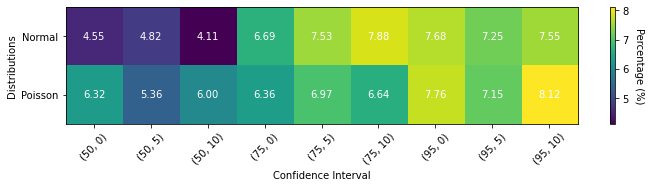

In [30]:
row_labels = ['Normal', 'Poisson']

# Create the heatmap
plt.figure(figsize=(10, 2.7))  # Adjust the size as per your preference
plt.imshow(matrix_gap, aspect='auto', interpolation='nearest')

# Show colorbar
cbar = plt.colorbar()
cbar.set_label('Percentage (%)', rotation=270, labelpad=15)

# Create text
for y in range(matrix_gap.shape[0]):
    for x in range(matrix_gap.shape[1]):
        plt.text(x, y, '%.2f' % matrix_gap[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='w'
                 )

# Set tick labels and show them
plt.xticks(np.arange(len(column_labels)), column_labels, rotation=45)
plt.yticks(np.arange(len(row_labels)), row_labels)
plt.xlabel('Confidence Interval')
plt.ylabel('Distributions')

# Set the title
# plt.title('Decreased avergae waiting time versus historical data (%)')
plt.savefig("average_waiting_historical.png", bbox_inches = 'tight')

# Show the plot
plt.tight_layout()
plt.show()

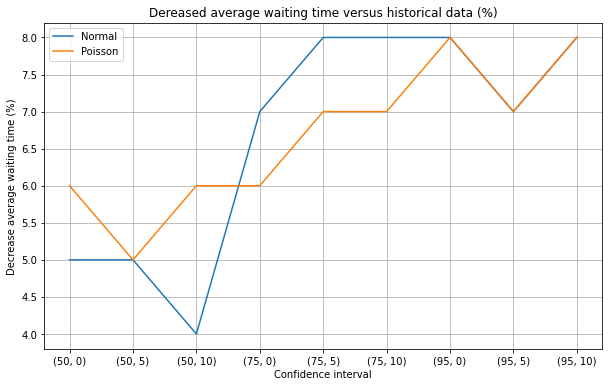

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(range(len(column_labels)), matrix_gap[0, :], label='Normal')
plt.plot(range(len(column_labels)), matrix_gap[1, :], label='Poisson')

plt.xticks(range(len(column_labels)), column_labels)
plt.xlabel("Confidence interval")
plt.ylabel("Decrease average waiting time (%)")
plt.title('Dereased average waiting time versus historical data (%)')

plt.legend()
plt.grid(True)

plt.show()

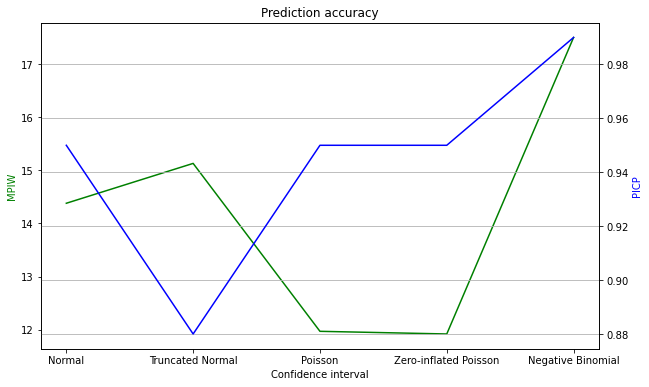

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 6))

MPIW = [14.38, 15.13, 11.97, 11.92, 17.50]
PICP = [0.95, 0.88, 0.95, 0.95, 0.99]
dist = ['Normal', 'Truncated Normal', 'Poisson', 'Zero-inflated Poisson', 'Negative Binomial']
x = range(len(dist))

ax2 = ax1.twinx()
ax1.plot(x, MPIW, 'g-')
ax2.plot(x, PICP, 'b-')

ax1.set_xlabel('Confidence interval')
ax1.set_xticks(x)
ax1.set_xticklabels(dist)
ax1.set_ylabel('MPIW', color='g')
ax2.set_ylabel('PICP', color='b')

plt.title("Prediction accuracy")
plt.grid(True)

plt.show()

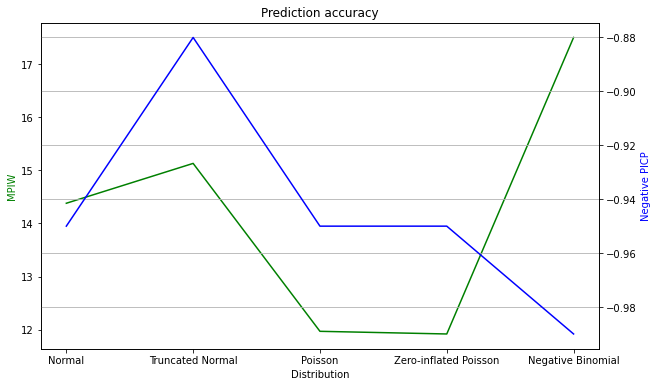

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

MPIW = [14.38, 15.13, 11.97, 11.92, 17.50]
PICP_neg = [-0.95, -0.88, -0.95, -0.95, -0.99]
dist = ['Normal', 'Truncated Normal', 'Poisson', 'Zero-inflated Poisson', 'Negative Binomial']
x = range(len(dist))

ax2 = ax1.twinx()
ax1.plot(x, MPIW, 'g-')
ax2.plot(x, PICP_neg, 'b-')

ax1.set_xlabel('Distribution')
ax1.set_xticks(x)
ax1.set_xticklabels(dist)
ax1.set_ylabel('MPIW', color='g')
ax2.set_ylabel('Negative PICP', color='b')

plt.title("Prediction accuracy")
plt.grid(True)
plt.savefig("prediction.png")

plt.show()